# ***Importing Required Library***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap

- ### ***DATA PREPROCESSING***

- ### ***Loading the Data***

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


- ### ***Converting Categorical Data to Numerical Data***
- ### ***Scaling Numerical Data using MinMax Scaler***

In [3]:
# Apply one-hot encoding to sex and race columns
df = pd.get_dummies(df, columns=['Sex', 'Race'])

# Apply binary encoding to categorical columns
binary_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Change other two categories of diabetic to yes to avoid overfitting. Yes because its effect is same as being diabetic..
df['Diabetic'] = df['Diabetic'].apply(lambda x: 1 if x == 'Yes (during pregnancy)' or x == 'Yes' or x == 'No, borderline diabetes' else 0)

# Apply LabelEncoder or OneHotEncoder to AgeCategory and SleepTime column
scaler = MinMaxScaler()

# Apply MinMaxScaler to BMI column
df['BMI'] = scaler.fit_transform(df[['BMI']])
df['PhysicalHealth'] = scaler.fit_transform(df[['PhysicalHealth']])
df['MentalHealth'] = scaler.fit_transform(df[['MentalHealth']])

df['AgeCategory'] = LabelEncoder().fit_transform(df['AgeCategory'])
df['AgeCategory'] = scaler.fit_transform(df[['AgeCategory']])

df['SleepTime'] = LabelEncoder().fit_transform(df['SleepTime'])
df['SleepTime'] = scaler.fit_transform(df[['SleepTime']])

# Replace values with their corresponding numeric values
gen_health_mapping = {'Excellent': 1, 'Very good': 0.75, 'Good': 0.5, 'Fair': 0.25, 'Poor': 0}
df['GenHealth'] = df['GenHealth'].replace(gen_health_mapping)

# Define mapping of values to numeric values
age_category_mapping = {'18 or below': 0, '18-24': 0.0714, '25-29': 0.1429, '30-34': 0.2143, '35-39': 0.2857,
           '40-44': 0.3571, '45-49': 0.4286, '50-54': 0.5, '55-59': 0.5714, '60-64': 0.6429,
           '65-69': 0.7143, '70-74': 0.7857, '75-79': 0.8571, '80 or older': 1}

# Replace values with their corresponding numeric values
df['AgeCategory'] = df['AgeCategory'].replace(age_category_mapping)

df.to_csv('heart_2020_cleaned_processed.csv',index=False)
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,0.055294,1,0,0,0.100000,1.0,0,0.583333,1,...,0,1,1,0,0,0,0,0,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,1.000000,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0.175782,1,0,0,0.666667,1.0,0,0.750000,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0.147169,0,0,0,0.000000,0.0,0,0.916667,0,...,0,1,1,0,0,0,0,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0.333333,0,...,0,0,1,0,0,0,0,0,0,1


- ### ***Loading this processed data***

In [4]:
df = pd.read_csv('heart_2020_cleaned_processed.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,0.055294,1,0,0,0.100000,1.0,0,0.583333,1,...,0,1,1,0,0,0,0,0,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,1.000000,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0.175782,1,0,0,0.666667,1.0,0,0.750000,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0.147169,0,0,0,0.000000,0.0,0,0.916667,0,...,0,1,1,0,0,0,0,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0.333333,0,...,0,0,1,0,0,0,0,0,0,1


- ### ***Defining Input & Target Variable***

In [5]:
x = df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White']]
y = df['HeartDisease']

- ### ***Train Test Split***

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

- # ***Training and Testing Different Models on Imbalanced Data***

- ### ***Defining Our Model***
- ### ***Training with train data***
- ### ***Predicting output of test data***
- ### ***Reporting Classification Report with Confusion Matrix***

- ### ***Logistic Regression***


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959

[[57862   505]
 [ 5021   571]]
0.9136009005769321


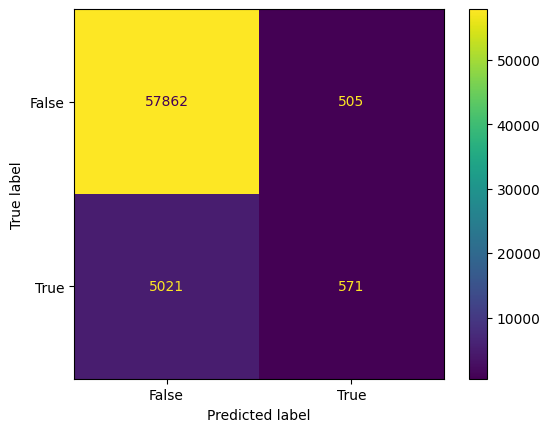

In [7]:
model1 = LogisticRegression(penalty='l2',max_iter=1000) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Wrap the model object in a predict function
predict_fn = lambda x: model1.predict_proba(x)[:, 1]

# Create a SHAP explainer object
explainer = shap.Explainer(predict_fn, x_train)

# Compute the SHAP values for the test set
shap_values = explainer(x_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, x_test, plot_type='bar', class_names=model1.classes_)


- ### ***KNN Classifier***

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.38      0.14      0.20      5592

    accuracy                           0.91     63959
   macro avg       0.65      0.56      0.58     63959
weighted avg       0.87      0.91      0.88     63959

[[57129  1238]
 [ 4831   761]]
0.9051110867899749


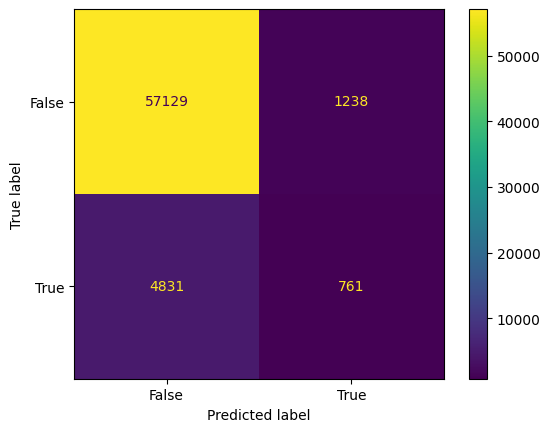

In [8]:
model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred2))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Wrap the model object in a predict function
predict_fn = lambda x: model1.predict_proba(x)[:, 1]

# Create a SHAP explainer object
explainer = shap.Explainer(predict_fn, x_train)

# Compute the SHAP values for the test set
shap_values = explainer(x_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, x_test, plot_type='bar', class_names=model1.classes_)


- ### ***Gaussian Naive Bayes***

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     58367
           1       0.26      0.50      0.34      5592

    accuracy                           0.83     63959
   macro avg       0.60      0.68      0.62     63959
weighted avg       0.89      0.83      0.86     63959

[[50466  7901]
 [ 2792  2800]]
0.832814771963289


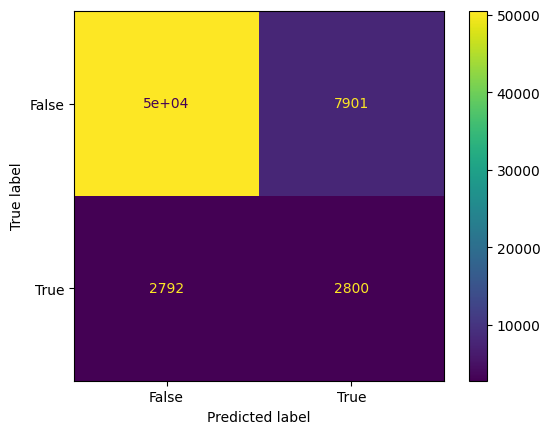

In [9]:
model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred4))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Decision Tree Classifier***

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58367
           1       0.24      0.25      0.24      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.58     63959
weighted avg       0.87      0.86      0.87     63959

[[53795  4572]
 [ 4177  1415]]
0.8632092434215669


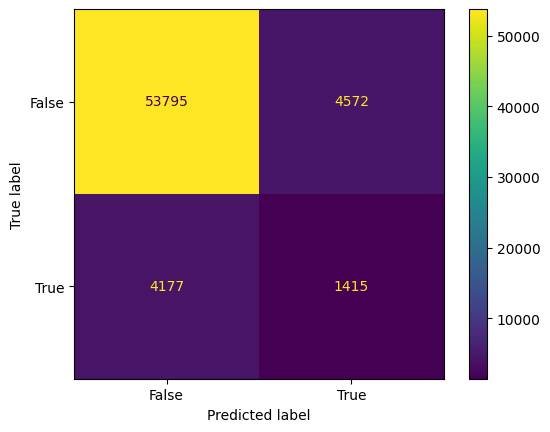

In [10]:
model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred5)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred5))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Random Forest Algorithm***

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959

[[57151  1216]
 [ 4951   641]]
0.9035788552041152


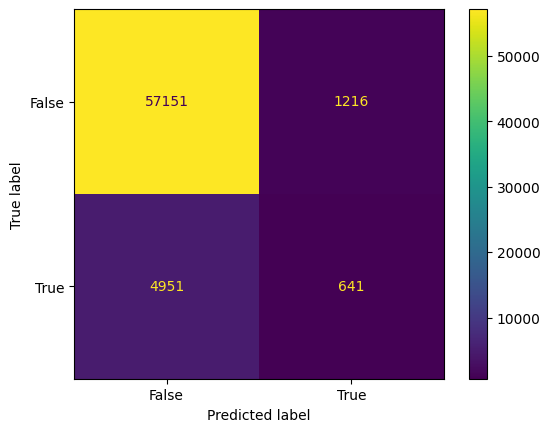

In [11]:
model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred6))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***XGB Classifier - (eXtreme Gradient Boosting)***

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.52      0.09      0.16      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.54      0.56     63959
weighted avg       0.88      0.91      0.88     63959

[[57895   472]
 [ 5071   521]]
0.913335105301834


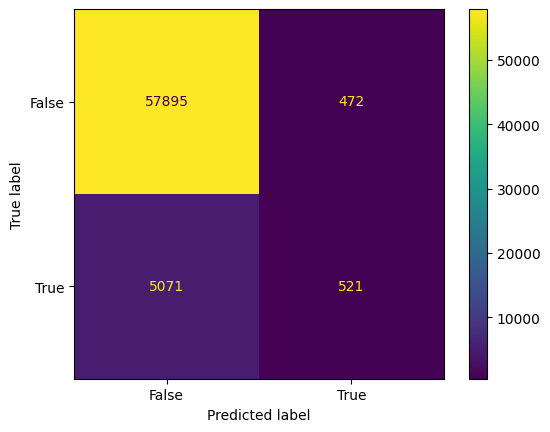

In [12]:
model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)

y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred7)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred7))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- # ***UnderSampling, OverSampling - SMOTE Technique to manage Data Imbalance***

- ## ***UnderSampling***

In [13]:
# Load CSV data
df = pd.read_csv('heart_2020_cleaned_processed.csv')

x = df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White']]
y = df['HeartDisease']

# Perform random undersampling followed by SMOTE
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x, y)

# Save the resampled data to a new CSV file
resampled_data = pd.concat([x_resampled, y_resampled], axis=1)
resampled_data.to_csv('heart_2020_cleaned_processed_undersampled.csv', index=False)

In [14]:
df = pd.read_csv('heart_2020_cleaned_processed_undersampled.csv')
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,0.166003,0,0,0,0.000000,0.000000,0,0.583333,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0.217554,0,0,0,0.000000,0.000000,0,0.583333,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0.166606,0,0,0,0.266667,0.000000,0,0.333333,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0.155378,1,0,0,0.666667,0.066667,0,0.166667,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.233007,1,0,0,0.000000,0.000000,0,0.083333,0,1,...,0,0,1,0,0,0,0,0,1,0


In [15]:
x = df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White']]
y = df['HeartDisease']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

- # ***Training and Testing Different Models on UnderSampled Data***

- ### ***Defining Our Model***
- ### ***Training with train data***
- ### ***Predicting output of test data***
- ### ***Reporting Classification Report with Confusion Matrix***

- ### ***Logistic Regression***


              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5434
           1       0.75      0.78      0.77      5516

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

[[4044 1390]
 [1235 4281]]
0.7602739726027398


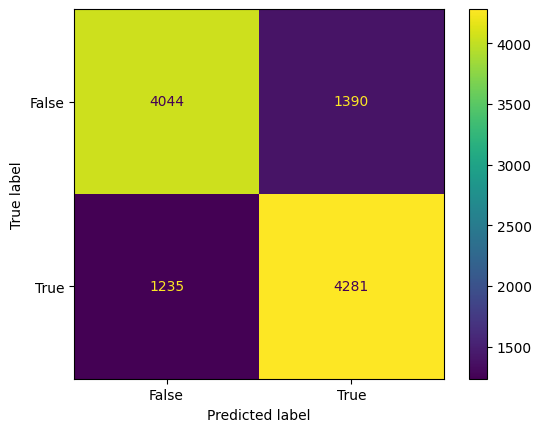

In [17]:
model1 = LogisticRegression(penalty='l2',max_iter=1000) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***KNN Classifier***

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      5434
           1       0.73      0.75      0.74      5516

    accuracy                           0.73     10950
   macro avg       0.73      0.73      0.73     10950
weighted avg       0.73      0.73      0.73     10950

[[3881 1553]
 [1390 4126]]
0.7312328767123287


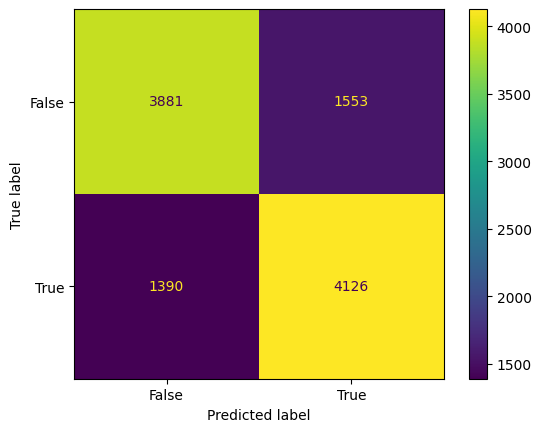

In [18]:
model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred2))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Gaussian Naive Bayes***

              precision    recall  f1-score   support

           0       0.69      0.79      0.73      5434
           1       0.76      0.65      0.70      5516

    accuracy                           0.72     10950
   macro avg       0.72      0.72      0.72     10950
weighted avg       0.72      0.72      0.72     10950

[[4280 1154]
 [1937 3579]]
0.717716894977169


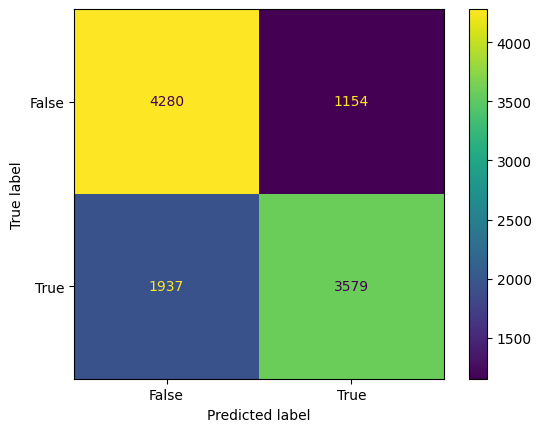

In [19]:
model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred4))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Decision Tree Classifier***

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5434
           1       0.67      0.66      0.67      5516

    accuracy                           0.67     10950
   macro avg       0.67      0.67      0.67     10950
weighted avg       0.67      0.67      0.67     10950

[[3679 1755]
 [1877 3639]]
0.6683105022831051


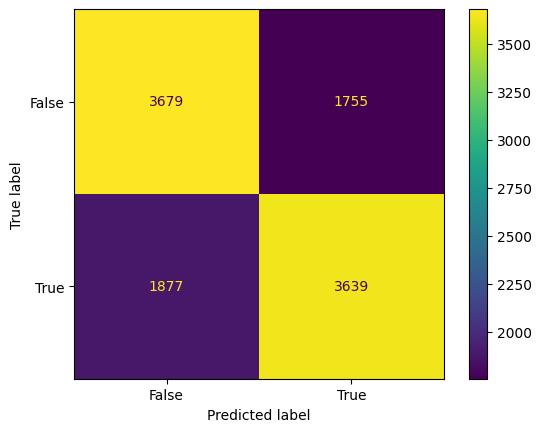

In [20]:
model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred5)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred5))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Random Forest Algorithm***

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      5434
           1       0.74      0.77      0.75      5516

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950

[[3907 1527]
 [1251 4265]]
0.7463013698630137


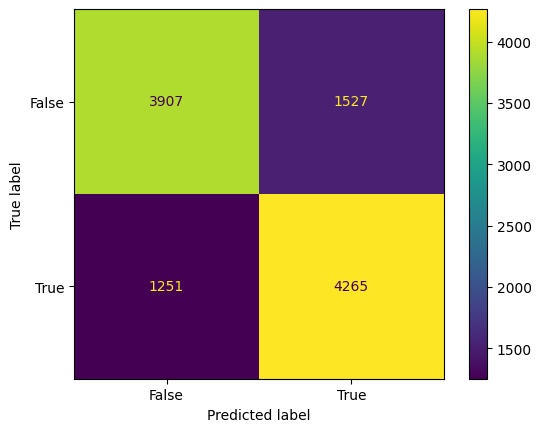

In [21]:
model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred6))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***XGB Classifier - (eXtreme Gradient Boosting)***

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5434
           1       0.74      0.80      0.77      5516

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

[[3926 1508]
 [1128 4388]]
0.759269406392694


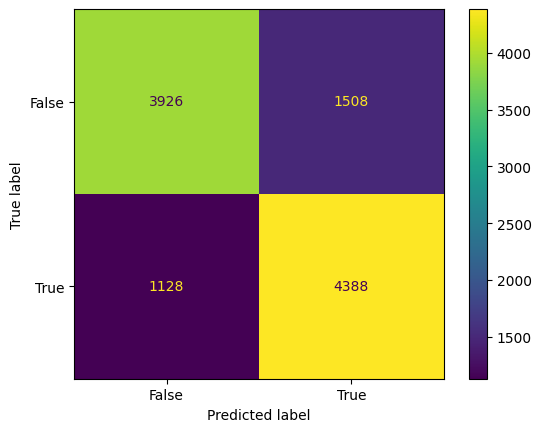

In [22]:
model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)

y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred7)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred7))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ## ***SMOTE - Synthetic Minority Oversampling Technique***

- SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
- Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [23]:
# Load CSV data
df = pd.read_csv('heart_2020_cleaned_processed.csv')

x = df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White']]
y = df['HeartDisease']

# Perform random undersampling followed by SMOTE
rus = SMOTE()
x_resampled, y_resampled = rus.fit_resample(x, y)

# Save the resampled data to a new CSV file
resampled_data = pd.concat([x_resampled, y_resampled], axis=1)
resampled_data.to_csv('heart_2020_cleaned_processed_undersampled.csv', index=False)

In [24]:
# Load CSV data
df = pd.read_csv('heart_2020_cleaned_processed.csv')

x = df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White']]
y = df['HeartDisease']

# Perform SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

# Save the resampled data to a new CSV file
resampled_data = pd.concat([x_resampled, y_resampled], axis=1)
resampled_data.to_csv('heart_2020_cleaned_processed_SMOTE.csv', index=False)

In [25]:
df = pd.read_csv('heart_2020_cleaned_processed_SMOTE.csv')
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,0.055294,1,0,0,0.100000,1.0,0,0.583333,1,1,...,1,1,0,0,0,0,0,0,1,0
1,0.100447,0,0,1,0.000000,0.0,0,1.000000,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.175782,1,0,0,0.666667,1.0,0,0.750000,1,1,...,0,0,1,0,0,0,0,0,1,0
3,0.147169,0,0,0,0.000000,0.0,0,0.916667,0,0,...,1,1,0,0,0,0,0,0,1,0
4,0.141132,0,0,0,0.933333,0.0,1,0.333333,0,1,...,0,1,0,0,0,0,0,0,1,0


In [26]:
x = df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White']]
y = df['HeartDisease']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

- # ***Training and Testing Different Models on SMOTE OverSampled Data***

- ### ***Defining Our Model***
- ### ***Training with train data***
- ### ***Predicting output of test data***
- ### ***Reporting Classification Report with Confusion Matrix***

- ### ***Logistic Regression***


              precision    recall  f1-score   support

           0       0.78      0.75      0.76     58485
           1       0.76      0.79      0.77     58484

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969

[[43590 14895]
 [12213 46271]]
0.7682462874778787


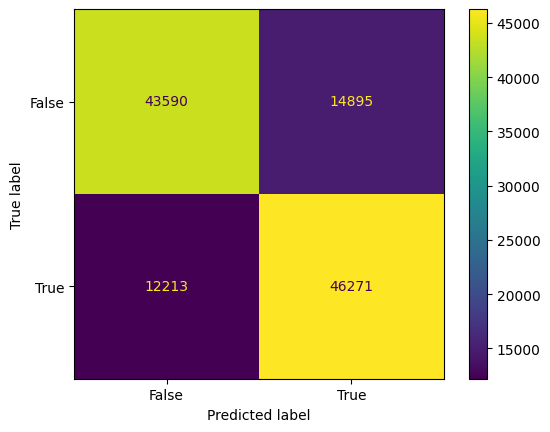

In [28]:
model1 = LogisticRegression(penalty='l2',max_iter=1000) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***KNN Classifier***

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     58485
           1       0.81      0.93      0.87     58484

    accuracy                           0.86    116969
   macro avg       0.87      0.86      0.86    116969
weighted avg       0.87      0.86      0.86    116969

[[45856 12629]
 [ 3929 54555]]
0.8584411254263951


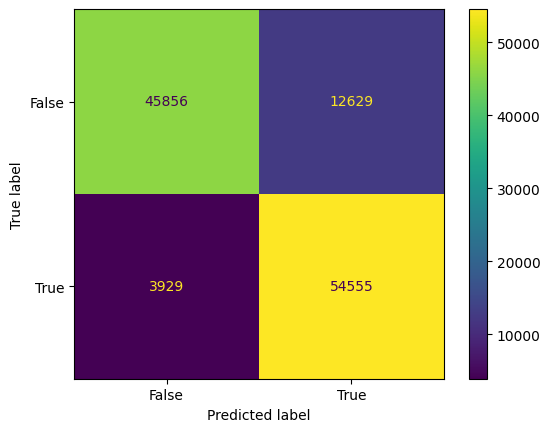

In [29]:
model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred2))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Gaussian Naive Bayes***

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     58485
           1       0.75      0.66      0.70     58484

    accuracy                           0.72    116969
   macro avg       0.72      0.72      0.72    116969
weighted avg       0.72      0.72      0.72    116969

[[45674 12811]
 [19863 38621]]
0.7206610298455146


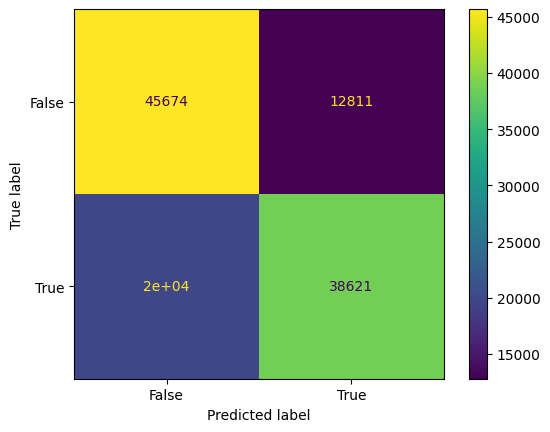

In [30]:
model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred4))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Decision Tree Classifier***

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     58485
           1       0.90      0.90      0.90     58484

    accuracy                           0.90    116969
   macro avg       0.90      0.90      0.90    116969
weighted avg       0.90      0.90      0.90    116969

[[52369  6116]
 [ 5923 52561]]
0.8970752934538211


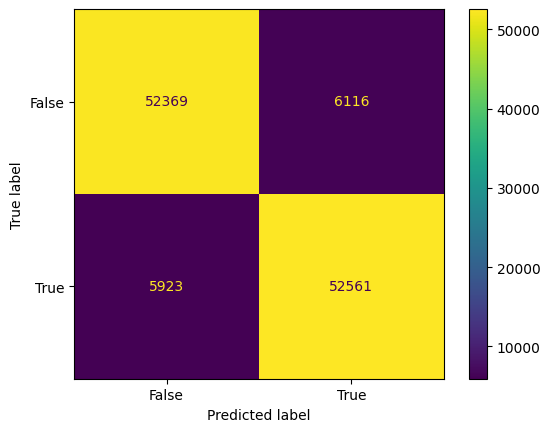

In [31]:
model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred5)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred5))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***Random Forest Algorithm***

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58485
           1       0.93      0.92      0.93     58484

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969

[[54278  4207]
 [ 4462 54022]]
0.9258863459549111


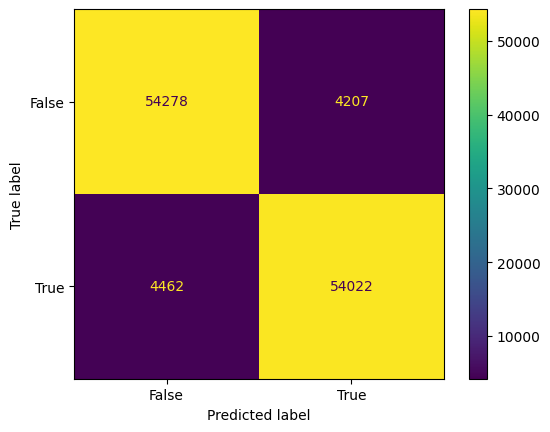

In [32]:
model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred6))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- ### ***XGB Classifier - (eXtreme Gradient Boosting)***

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     58485
           1       0.95      0.89      0.92     58484

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969

[[55739  2746]
 [ 6458 52026]]
0.9213124845044414


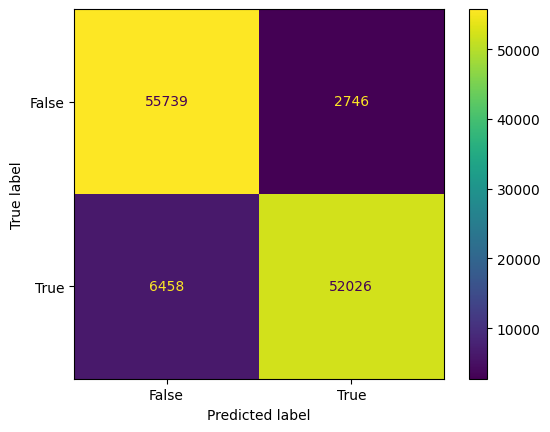

In [33]:
model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)

y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred7)
print(confusion_matrix)

print(metrics.accuracy_score(y_test, y_pred7))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()